# Issues with low cost HOSVD (Soledad's version)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
import time
import kagglehub
import json
from tqdm import tqdm
import os

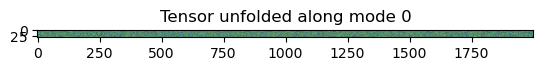

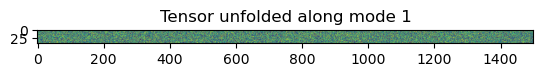

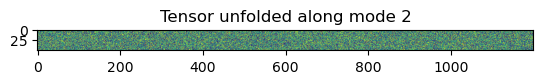

<Figure size 640x480 with 0 Axes>

In [65]:
path_figs = "./FULL_EXPLANATION"
tensor = np.random.rand(30,40,50)
for i in range(tensor.ndim):
    plt.title(f"Tensor unfolded along mode {i}")
    plt.imshow(tl.unfold(tensor=tensor, mode=i))
    sampled_indices = np.arange(0, tensor.shape[2], 2)  # [0, 2, 4, ..., 48]

    plt.figure()

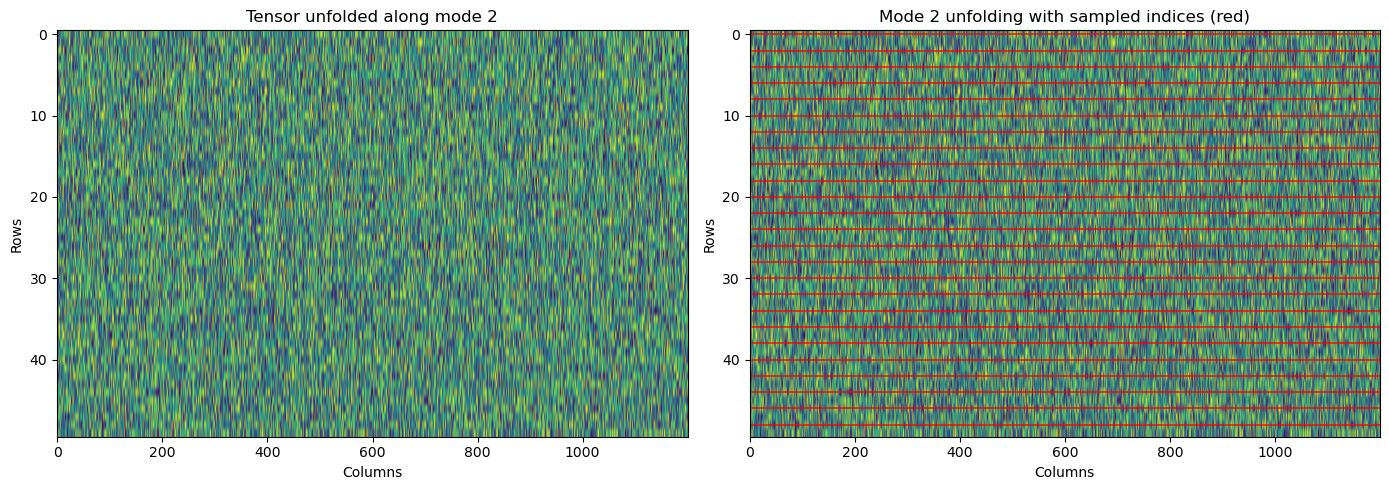

In [66]:
path_figs = "./FULL_EXPLANATION"
tensor = np.random.rand(30, 40, 50)

# Subsample every second point in the last dimension (dimension 2)
sampled_indices = np.arange(0, tensor.shape[2], 2)  # [0, 2, 4, ..., 48]

# Create subplots: 1 row x 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Mode 2 unfolding
unfolded = tl.unfold(tensor=tensor, mode=2)

# Left: regular unfolding
axes[0].set_title(f"Tensor unfolded along mode 2")
axes[0].imshow(unfolded, aspect='auto')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Rows')

# Right: unfolding with horizontal red lines
axes[1].set_title(f"Mode 2 unfolding with sampled indices (red)")
axes[1].imshow(unfolded, aspect='auto')
for idx in sampled_indices:
    axes[1].axhline(y=idx, color='red', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Rows')

plt.tight_layout()
plt.savefig(f'{path_figs}/mode2_unfolding_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [67]:
"""
reynolds_numbers = [8000]
paths = [f"sharmapushan/hydrogen-jet-{re}" for re in reynolds_numbers]
data_paths = [kagglehub.dataset_download(name) for name in paths]
#this part of the code is taken from multiple RE analysis
data_path = data_paths[0]
with open(data_paths[0] + '/info.json') as f:
    metadata = json.load(f)
# variable definition
subsample_x, subsample_y = 10,10
Nx, Ny = metadata['global']['Nxyz']
n_snapshots = metadata['global']['snapshots'] - 1
Nx_sub = Nx // subsample_x
Ny_sub = Ny // subsample_y

component_names = ['YH', 'YH2', 'YO', 'YO2', 'YOH', 'YH2O', 'YHO2', 'YH2O2']
species_names = [cname[1:] for cname in component_names]
n_species = len(component_names)
molar_masses = {'YH': 1.0, 'YH2': 2.0, 'YO': 8.0, 'YO2': 16.0, 'YOH': 9.0, 'YH2O': 10.0, 'YHO2': 17.0, 'YH2O2': 18.0}
file_key_map = file_key_map = {'YH': 'YH filename', 'YH2': 'YH2 filename', 'YO': 'YO filename', 'YO2': 'YO2 filename',
                                'YOH': 'YOH filename', 'YH2O': 'YH2O filename', 'YHO2': 'YHO2 filename', 'YH2O2': 'YH2O2 filename'
}

Lx, Ly = 12.5, 15.6# domain size in D units

print(f"Grid: {Nx}x{Ny}, Subsampled: {Nx_sub}x{Ny_sub}")

tensor_ = np.zeros((Ny_sub, Nx_sub, n_species, n_snapshots))

for t_idx in tqdm(range(n_snapshots)):
    for new_idx, (comp_name, orig_idx) in enumerate(zip(component_names, range(n_species))):
        filename_key = file_key_map[comp_name]
        filename = metadata['local'][t_idx][filename_key]
        data = np.fromfile(f"{data_path}/{filename}", dtype='<f4').reshape(Ny, Nx)
        molar_data = data / molar_masses[comp_name]
        tensor_[:, :, new_idx, t_idx] = molar_data[::subsample_x, ::subsample_y]
    
print(tensor.shape)
print("Data loading complete!")
tensor = tensor_[:, :, 4, :]
"""

'\nreynolds_numbers = [8000]\npaths = [f"sharmapushan/hydrogen-jet-{re}" for re in reynolds_numbers]\ndata_paths = [kagglehub.dataset_download(name) for name in paths]\n#this part of the code is taken from multiple RE analysis\ndata_path = data_paths[0]\nwith open(data_paths[0] + \'/info.json\') as f:\n    metadata = json.load(f)\n# variable definition\nsubsample_x, subsample_y = 10,10\nNx, Ny = metadata[\'global\'][\'Nxyz\']\nn_snapshots = metadata[\'global\'][\'snapshots\'] - 1\nNx_sub = Nx // subsample_x\nNy_sub = Ny // subsample_y\n\ncomponent_names = [\'YH\', \'YH2\', \'YO\', \'YO2\', \'YOH\', \'YH2O\', \'YHO2\', \'YH2O2\']\nspecies_names = [cname[1:] for cname in component_names]\nn_species = len(component_names)\nmolar_masses = {\'YH\': 1.0, \'YH2\': 2.0, \'YO\': 8.0, \'YO2\': 16.0, \'YOH\': 9.0, \'YH2O\': 10.0, \'YHO2\': 17.0, \'YH2O2\': 18.0}\nfile_key_map = file_key_map = {\'YH\': \'YH filename\', \'YH2\': \'YH2 filename\', \'YO\': \'YO filename\', \'YO2\': \'YO2 filename\',\

# Subsampled HOSVD

(30, 160)
(40, 120)
(50, 96)
0.027558326721191406
True


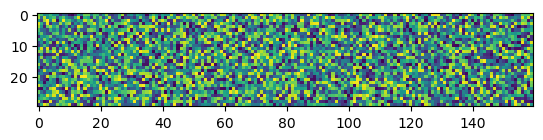

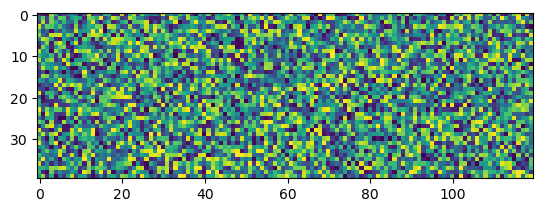

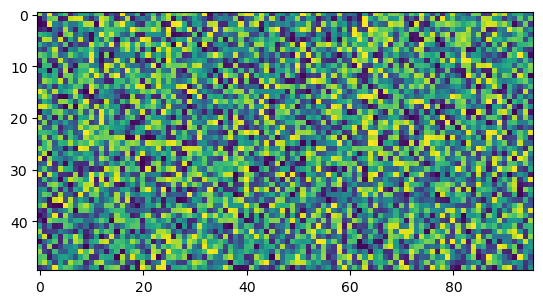

<Figure size 640x480 with 0 Axes>

In [68]:
sampling_ratio = 0.08
t_start = time.time()
factors = []
for mode in range(tensor.ndim):
    unfolded = tl.unfold(tensor, mode)
    m, n = unfolded.shape
    n_samples = int(n * sampling_ratio)        
    sample_indices = np.random.choice(n, size=n_samples, replace=False)
    sampled_matrix = unfolded[:, sample_indices]
    plt.imshow(sampled_matrix)
    plt.figure()
    print(sampled_matrix.shape)
    U, _, _ = np.linalg.svd(sampled_matrix, full_matrices=False)    
    factors.append(U)
core = tl.tenalg.multi_mode_dot(tensor, [U.T for U in factors], modes = [mode for mode in range(tensor.ndim)])
t_end = time.time()
print(t_end - t_start)

reconst = tl.tenalg.multi_mode_dot(core, factors, modes = [mode for mode in range(tensor.ndim)])
print(np.allclose(tensor, reconst))

# Low Cost HOSVD

This is without sign fixing and labor reorthogonalization, still the main idea is the same

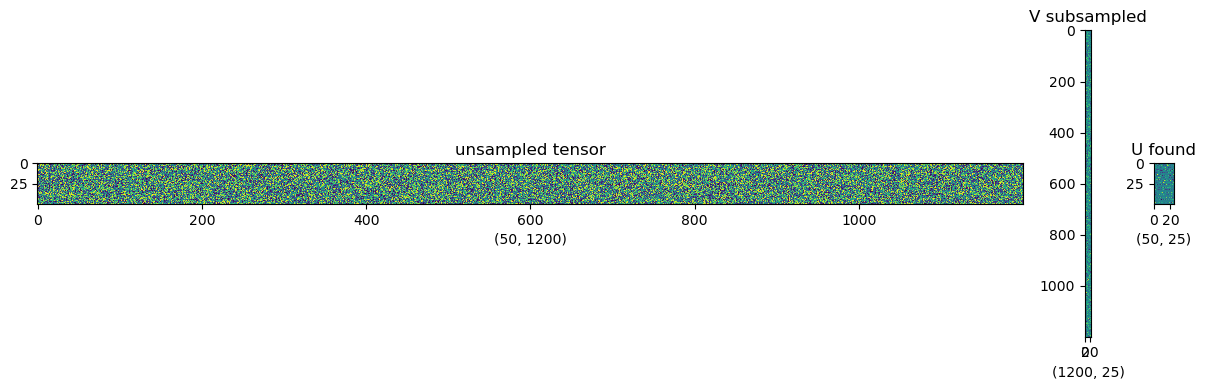

Time: 0.35392141342163086
False


In [69]:
t_start = time.time()
subsampled_tensor = tensor[:, :, ::2]
factors_lc = []

for mode in range(tensor.ndim):
    unfolded = tl.unfold(subsampled_tensor, mode)
    
    if mode != tensor.ndim - 1:
        U, _, _ = np.linalg.svd(unfolded, full_matrices=False)    
    else:
        U_red, sigma, V_red = np.linalg.svd(unfolded, full_matrices=False)        
        Q, R = np.linalg.qr(U_red)
        U_red = U_red @ np.linalg.inv(R)
        Q, R = np.linalg.qr(V_red.T)
        V_red = (V_red.T @ np.linalg.inv(R)).T
        ss = U_red.T @ unfolded @ V_red.T
        ss_sign = np.sign(np.diag(ss))
        V_red = V_red.T @ np.diag(ss_sign)
        V_red = V_red.T
        non_sampled_unfolded = tl.unfold(tensor, mode)
        U = non_sampled_unfolded @ V_red.T @ np.diag(1/sigma)
        Q, _ = np.linalg.qr(U)
        U = Q
        matrices = [non_sampled_unfolded,V_red.T,  U]

        widths = [m.shape[1] for m in matrices]

        fig, ax = plt.subplots(
            1, 3,
            figsize=(12, 4),
            gridspec_kw={'width_ratios': widths}
        )

        titles = ["unsampled tensor","V subsampled",  "U found"]

        for a, M, title in zip(ax, matrices, titles):
            a.imshow(M, aspect='equal', interpolation='none')
            a.set_title(title)
            a.set_xlabel(str(M.shape))

        plt.tight_layout()
        plt.savefig(fname = path_figs + "/matrices_product.png")
    
        plt.show()
    factors_lc.append(U)
core = tl.tenalg.multi_mode_dot(tensor, [U.T for U in factors_lc],modes=[mode for mode in range(tensor.ndim)])
t_end = time.time()
print(f"Time: {t_end - t_start}")

reconst_lc = tl.tenalg.multi_mode_dot(core, factors_lc, modes=[mode for mode in range(tensor.ndim)])
print(np.allclose(tensor, reconst_lc))

# Performance Comparison: Tensor Size Sweep

Comparing computation times for Low Cost HOSVD vs Subsampled HOSVD as tensor dimensions increase

Running tensor size sweep...
------------------------------------------------------------

Size: 30x30x30 (Total elements: 27,000)
  Subsampled HOSVD: 0.0017s, Compression: 0.91x, Error: 1.16e-15
  Low Cost HOSVD:   0.0030s, Compression: 1.71x, Error: 3.50e-01
  Time Speedup: 0.57x

Size: 35x35x35 (Total elements: 42,875)
  Subsampled HOSVD: 0.0018s, Compression: 0.92x, Error: 1.50e-15
  Low Cost HOSVD:   0.0033s, Compression: 1.71x, Error: 3.43e-01
  Time Speedup: 0.54x

Size: 40x40x40 (Total elements: 64,000)
  Subsampled HOSVD: 0.0024s, Compression: 0.93x, Error: 1.44e-15
  Low Cost HOSVD:   0.0035s, Compression: 1.78x, Error: 3.47e-01
  Time Speedup: 0.68x

Size: 45x45x45 (Total elements: 91,125)
  Subsampled HOSVD: 0.0027s, Compression: 0.94x, Error: 2.13e-15
  Low Cost HOSVD:   0.0049s, Compression: 1.76x, Error: 3.46e-01
  Time Speedup: 0.55x

Size: 50x50x50 (Total elements: 125,000)
  Subsampled HOSVD: 0.0039s, Compression: 0.94x, Error: 1.54e-15
  Low Cost HOSVD:   0.0060s, Co

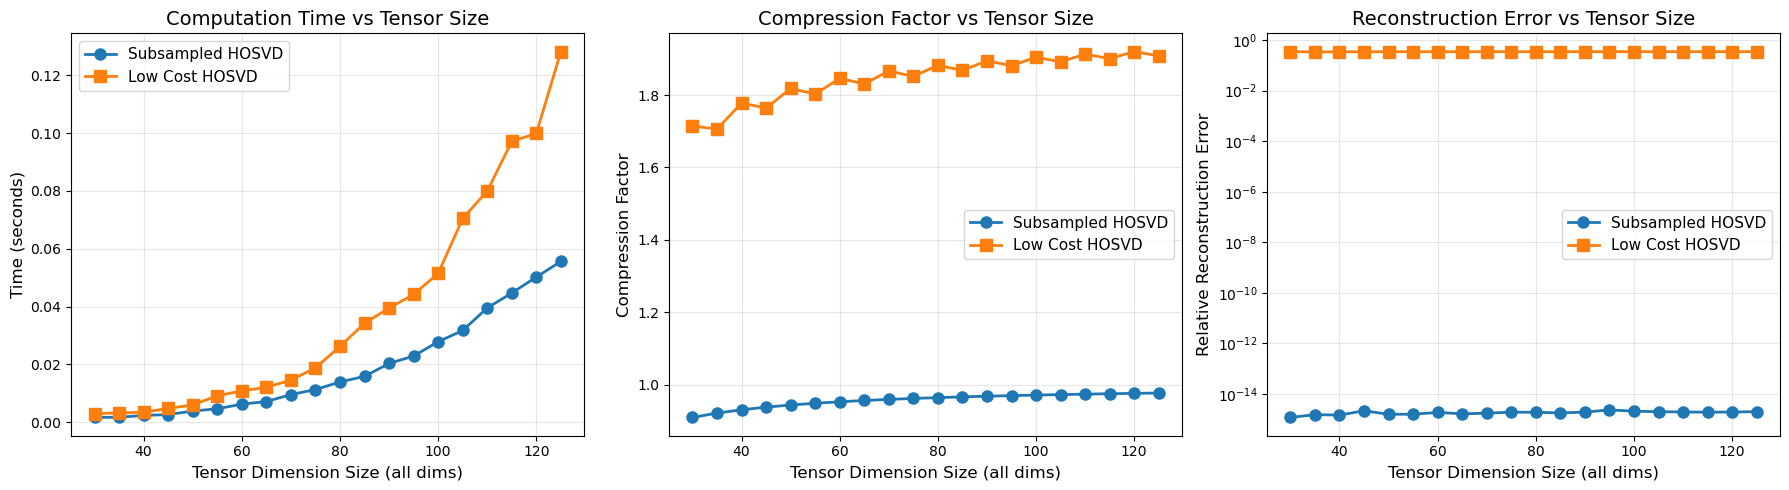


SUMMARY STATISTICS

Time Comparison:
  Average speedup (Subsampled/Low Cost): 0.54x
  Median speedup: 0.54x
  Min speedup: 0.43x
  Max speedup: 0.68x

Compression Factor Comparison:
  Subsampled HOSVD - Average: 0.96x, Min: 0.91x, Max: 0.98x
  Low Cost HOSVD - Average: 1.85x, Min: 1.71x, Max: 1.92x

Reconstruction Error Comparison:
  Subsampled HOSVD - Average: 1.79e-15, Min: 1.16e-15, Max: 2.31e-15
  Low Cost HOSVD - Average: 3.50e-01, Min: 3.43e-01, Max: 3.52e-01


In [70]:
# Size sweep parameters
base_size = 30
increment = 5
num_sizes = 20
sampling_ratio = 0.1

# Storage for results
sizes = []
times_subsampled = []
times_low_cost = []
compression_factors_subsampled = []
compression_factors_low_cost = []
reconstruction_errors_subsampled = []
reconstruction_errors_low_cost = []

print("Running tensor size sweep...")
print("-" * 60)

for i in range(num_sizes):
    # Calculate current size (increase all dimensions by 5 each iteration)
    current_size = base_size + i * increment
    n1, n2, n3 = current_size, current_size, current_size
    sizes.append(current_size)
    
    # Generate random tensor
    test_tensor = np.random.rand(n1, n2, n3)
    original_size = test_tensor.size
    tensor_norm = np.linalg.norm(test_tensor)
    
    print(f"\nSize: {n1}x{n2}x{n3} (Total elements: {n1*n2*n3:,})")
    
    # ========== SUBSAMPLED HOSVD ==========
    t_start = time.time()
    factors_sub = []
    for mode in range(test_tensor.ndim):
        unfolded = tl.unfold(test_tensor, mode)
        m, n = unfolded.shape
        n_samples = int(n * sampling_ratio)
        sample_indices = np.random.choice(n, size=n_samples, replace=False)
        sampled_matrix = unfolded[:, sample_indices]
        U, _, _ = np.linalg.svd(sampled_matrix, full_matrices=False)
        factors_sub.append(U)
    core_sub = tl.tenalg.multi_mode_dot(test_tensor, [U.T for U in factors_sub], 
                                        modes=[mode for mode in range(test_tensor.ndim)])
    t_subsampled = time.time() - t_start
    times_subsampled.append(t_subsampled)
    
    decomp_size_sub = core_sub.size + sum(U.size for U in factors_sub)
    compression_factor_sub = original_size / decomp_size_sub
    compression_factors_subsampled.append(compression_factor_sub)
    
    reconst_sub = tl.tenalg.multi_mode_dot(core_sub, factors_sub, modes=[mode for mode in range(test_tensor.ndim)])
    error_sub = np.linalg.norm(test_tensor - reconst_sub) / tensor_norm
    reconstruction_errors_subsampled.append(error_sub)
    
    print(f"  Subsampled HOSVD: {t_subsampled:.4f}s, Compression: {compression_factor_sub:.2f}x, Error: {error_sub:.2e}")
    
    # ========== LOW COST HOSVD ==========
    t_start = time.time()
    subsampled_tensor_lc = test_tensor[:, :, ::2]
    factors_lc = []
    
    for mode in range(test_tensor.ndim):
        unfolded = tl.unfold(subsampled_tensor_lc, mode)
        
        if mode != test_tensor.ndim - 1:
            U, _, _ = np.linalg.svd(unfolded, full_matrices=False)
        else:
            U_red, sigma, V_red = np.linalg.svd(unfolded, full_matrices=False)
            Q, R = np.linalg.qr(U_red)
            U_red = U_red @ np.linalg.inv(R)
            Q, R = np.linalg.qr(V_red.T)
            V_red = (V_red.T @ np.linalg.inv(R)).T
            ss = U_red.T @ unfolded @ V_red.T
            ss_sign = np.sign(np.diag(ss))
            V_red = V_red.T @ np.diag(ss_sign)
            V_red = V_red.T
            non_sampled_unfolded = tl.unfold(test_tensor, mode)
            U = non_sampled_unfolded @ V_red.T @ np.diag(1/sigma)
            Q, _ = np.linalg.qr(U)
            U = Q
        
        factors_lc.append(U)
    
    core_lc = tl.tenalg.multi_mode_dot(test_tensor, [U.T for U in factors_lc],
                                       modes=[mode for mode in range(test_tensor.ndim)])
    t_low_cost = time.time() - t_start
    times_low_cost.append(t_low_cost)

    decomp_size_lc = core_lc.size + sum(U.size for U in factors_lc)
    compression_factor_lc = original_size / decomp_size_lc
    compression_factors_low_cost.append(compression_factor_lc)
    
    reconst_lc = tl.tenalg.multi_mode_dot(core_lc, factors_lc, modes=[mode for mode in range(test_tensor.ndim)])
    error_lc = np.linalg.norm(test_tensor - reconst_lc) / tensor_norm
    reconstruction_errors_low_cost.append(error_lc)
    
    print(f"  Low Cost HOSVD:   {t_low_cost:.4f}s, Compression: {compression_factor_lc:.2f}x, Error: {error_lc:.2e}")
    print(f"  Time Speedup: {t_subsampled/t_low_cost:.2f}x")

print("\n" + "=" * 60)
print("Sweep complete!")

# ========== PLOTTING ==========
fig = plt.figure(figsize=(18, 5))

# Plot 1: Time vs Size
plt.subplot(1, 3, 1)
plt.plot(sizes, times_subsampled, 'o-', label='Subsampled HOSVD', linewidth=2, markersize=8)
plt.plot(sizes, times_low_cost, 's-', label='Low Cost HOSVD', linewidth=2, markersize=8)
plt.xlabel('Tensor Dimension Size (all dims)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Computation Time vs Tensor Size', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Plot 2: Compression Factor vs Size
plt.subplot(1, 3, 2)
plt.plot(sizes, compression_factors_subsampled, 'o-', label='Subsampled HOSVD', linewidth=2, markersize=8)
plt.plot(sizes, compression_factors_low_cost, 's-', label='Low Cost HOSVD', linewidth=2, markersize=8)
plt.xlabel('Tensor Dimension Size (all dims)', fontsize=12)
plt.ylabel('Compression Factor', fontsize=12)
plt.title('Compression Factor vs Tensor Size', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Plot 3: Reconstruction Error vs Size
plt.subplot(1, 3, 3)
plt.plot(sizes, reconstruction_errors_subsampled, 'o-', label='Subsampled HOSVD', linewidth=2, markersize=8)
plt.plot(sizes, reconstruction_errors_low_cost, 's-', label='Low Cost HOSVD', linewidth=2, markersize=8)
plt.xlabel('Tensor Dimension Size (all dims)', fontsize=12)
plt.yscale('log')
plt.ylabel('Relative Reconstruction Error', fontsize=12)
plt.title('Reconstruction Error vs Tensor Size', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.savefig(f'{path_figs}/full_comparison_sweep.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print(f"\nTime Comparison:")
print(f"  Average speedup (Subsampled/Low Cost): {np.mean(np.array(times_subsampled)/np.array(times_low_cost)):.2f}x")
print(f"  Median speedup: {np.median(np.array(times_subsampled)/np.array(times_low_cost)):.2f}x")
print(f"  Min speedup: {np.min(np.array(times_subsampled)/np.array(times_low_cost)):.2f}x")
print(f"  Max speedup: {np.max(np.array(times_subsampled)/np.array(times_low_cost)):.2f}x")

print(f"\nCompression Factor Comparison:")
print(f"  Subsampled HOSVD - Average: {np.mean(compression_factors_subsampled):.2f}x, Min: {np.min(compression_factors_subsampled):.2f}x, Max: {np.max(compression_factors_subsampled):.2f}x")
print(f"  Low Cost HOSVD - Average: {np.mean(compression_factors_low_cost):.2f}x, Min: {np.min(compression_factors_low_cost):.2f}x, Max: {np.max(compression_factors_low_cost):.2f}x")

print(f"\nReconstruction Error Comparison:")
print(f"  Subsampled HOSVD - Average: {np.mean(reconstruction_errors_subsampled):.2e}, Min: {np.min(reconstruction_errors_subsampled):.2e}, Max: {np.max(reconstruction_errors_subsampled):.2e}")
print(f"  Low Cost HOSVD - Average: {np.mean(reconstruction_errors_low_cost):.2e}, Min: {np.min(reconstruction_errors_low_cost):.2e}, Max: {np.max(reconstruction_errors_low_cost):.2e}")

In [ ]:
# Load combustion data
reynolds_numbers = [8000]
paths = [f"sharmapushan/hydrogen-jet-{re}" for re in reynolds_numbers]
data_paths = [kagglehub.dataset_download(name) for name in paths]

# Load metadata
data_path = data_paths[0]
with open(data_paths[0] + '/info.json') as f:
    metadata = json.load(f)

# Get grid dimensions
Nx, Ny = metadata['global']['Nxyz']
n_snapshots = metadata['global']['snapshots'] - 1

component_names = ['YH', 'YH2', 'YO', 'YO2', 'YOH', 'YH2O', 'YHO2', 'YH2O2']
species_names = [cname[1:] for cname in component_names]
n_species = len(component_names)
molar_masses = {'YH': 1.0, 'YH2': 2.0, 'YO': 8.0, 'YO2': 16.0, 'YOH': 9.0, 'YH2O': 10.0, 'YHO2': 17.0, 'YH2O2': 18.0}
file_key_map = {'YH': 'YH filename', 'YH2': 'YH2 filename', 'YO': 'YO filename', 'YO2': 'YO2 filename',
                'YOH': 'YOH filename', 'YH2O': 'YH2O filename', 'YHO2': 'YHO2 filename', 'YH2O2': 'YH2O2 filename'}

print(f"Original grid: {Nx}x{Ny}, Snapshots: {n_snapshots}")
print(f"Species: {species_names}")

# Sweep parameters for decreasing subsample factors (increasing tensor size)
subsample_factors = [20, 15, 12, 10, 8, 6]  # Higher = more subsampling = smaller tensor
sampling_ratio = 0.08

# Storage for results
actual_sizes = []
times_subsampled_comb = []
times_low_cost_comb = []
compression_factors_subsampled_comb = []
compression_factors_low_cost_comb = []
reconstruction_errors_subsampled_comb = []
reconstruction_errors_low_cost_comb = []

print("\nRunning combustion data sweep over subsample factors...")
print("=" * 80)

for subsample_factor in subsample_factors:
    subsample_x, subsample_y = subsample_factor, subsample_factor
    Nx_sub = Nx // subsample_x
    Ny_sub = Ny // subsample_y
    
    print(f"\nSubsample factor: {subsample_factor}x{subsample_factor}")
    print(f"Subsampled grid: {Nx_sub}x{Ny_sub}, Tensor shape will be: ({Ny_sub}, {Nx_sub}, {n_snapshots})")
    
    # Load the tensor with current subsampling
    tensor_full = np.zeros((Ny_sub, Nx_sub, n_species, n_snapshots))
    
    print("Loading data...")
    for t_idx in tqdm(range(n_snapshots), desc=f"Loading snapshots (subsample={subsample_factor})"):
        for new_idx, comp_name in enumerate(component_names):
            filename_key = file_key_map[comp_name]
            filename = metadata['local'][t_idx][filename_key]
            data = np.fromfile(f"{data_path}/{filename}", dtype='<f4').reshape(Ny, Nx)
            molar_data = data / molar_masses[comp_name]
            tensor_full[:, :, new_idx, t_idx] = molar_data[::subsample_y, ::subsample_x]
    
    # Use YOH (index 4) species for analysis
    combustion_tensor = tensor_full[:, :, 4, :]
    
    original_size = combustion_tensor.size
    tensor_norm = np.linalg.norm(combustion_tensor)
    actual_sizes.append(Nx_sub * Ny_sub)  # Use spatial size as x-axis
    
    print(f"Tensor shape: {combustion_tensor.shape}, Total elements: {original_size:,}")
    
    # ========== SUBSAMPLED HOSVD ==========
    print("Running Subsampled HOSVD...")
    t_start = time.time()
    factors_sub = []
    for mode in range(combustion_tensor.ndim):
        unfolded = tl.unfold(combustion_tensor, mode)
        m, n = unfolded.shape
        n_samples = int(n * sampling_ratio)
        sample_indices = np.random.choice(n, size=n_samples, replace=False)
        sampled_matrix = unfolded[:, sample_indices]
        U, _, _ = np.linalg.svd(sampled_matrix, full_matrices=False)
        factors_sub.append(U)
    core_sub = tl.tenalg.multi_mode_dot(combustion_tensor, [U.T for U in factors_sub], 
                                        modes=[mode for mode in range(combustion_tensor.ndim)])
    t_subsampled = time.time() - t_start
    times_subsampled_comb.append(t_subsampled)
    
    decomp_size_sub = core_sub.size + sum(U.size for U in factors_sub)
    compression_factor_sub = original_size / decomp_size_sub
    compression_factors_subsampled_comb.append(compression_factor_sub)
    
    reconst_sub = tl.tenalg.multi_mode_dot(core_sub, factors_sub, modes=[mode for mode in range(combustion_tensor.ndim)])
    error_sub = np.linalg.norm(combustion_tensor - reconst_sub) / tensor_norm
    reconstruction_errors_subsampled_comb.append(error_sub)
    
    print(f"  Time: {t_subsampled:.4f}s, Compression: {compression_factor_sub:.2f}x, Error: {error_sub:.2e}")
    
    # ========== LOW COST HOSVD ==========
    print("Running Low Cost HOSVD...")
    t_start = time.time()
    subsampled_tensor_lc = combustion_tensor[:, :, ::2]
    factors_lc = []
    
    for mode in range(combustion_tensor.ndim):
        unfolded = tl.unfold(subsampled_tensor_lc, mode)
        
        if mode != combustion_tensor.ndim - 1:
            U, _, _ = np.linalg.svd(unfolded, full_matrices=False)
        else:
            U_red, sigma, V_red = np.linalg.svd(unfolded, full_matrices=False)
            Q, R = np.linalg.qr(U_red)
            U_red = U_red @ np.linalg.inv(R)
            Q, R = np.linalg.qr(V_red.T)
            V_red = (V_red.T @ np.linalg.inv(R)).T
            ss = U_red.T @ unfolded @ V_red.T
            ss_sign = np.sign(np.diag(ss))
            V_red = V_red.T @ np.diag(ss_sign)
            V_red = V_red.T
            non_sampled_unfolded = tl.unfold(combustion_tensor, mode)
            U = non_sampled_unfolded @ V_red.T @ np.diag(1/sigma)
            Q, _ = np.linalg.qr(U)
            U = Q
        
        factors_lc.append(U)
    
    core_lc = tl.tenalg.multi_mode_dot(combustion_tensor, [U.T for U in factors_lc],
                                       modes=[mode for mode in range(combustion_tensor.ndim)])
    t_low_cost = time.time() - t_start
    times_low_cost_comb.append(t_low_cost)
    
    decomp_size_lc = core_lc.size + sum(U.size for U in factors_lc)
    compression_factor_lc = original_size / decomp_size_lc
    compression_factors_low_cost_comb.append(compression_factor_lc)
    
    reconst_lc = tl.tenalg.multi_mode_dot(core_lc, factors_lc, modes=[mode for mode in range(combustion_tensor.ndim)])
    error_lc = np.linalg.norm(combustion_tensor - reconst_lc) / tensor_norm
    reconstruction_errors_low_cost_comb.append(error_lc)
    
    print(f"  Time: {t_low_cost:.4f}s, Compression: {compression_factor_lc:.2f}x, Error: {error_lc:.2e}")
    print(f"  Speedup (Subsampled/Low Cost): {t_subsampled/t_low_cost:.2f}x")

print("\n" + "=" * 80)
print("Combustion data sweep complete!")

# ========== PLOTTING ==========
fig = plt.figure(figsize=(18, 5))

# Plot 1: Time vs Spatial Resolution
plt.subplot(1, 3, 1)
plt.plot(actual_sizes, times_subsampled_comb, 'o-', label='Subsampled HOSVD', linewidth=2, markersize=8)
plt.plot(actual_sizes, times_low_cost_comb, 's-', label='Low Cost HOSVD', linewidth=2, markersize=8)
plt.xlabel('Spatial Resolution (Nx_sub × Ny_sub)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Computation Time vs Spatial Resolution', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Plot 2: Compression Factor vs Spatial Resolution
plt.subplot(1, 3, 2)
plt.plot(actual_sizes, compression_factors_subsampled_comb, 'o-', label='Subsampled HOSVD', linewidth=2, markersize=8)
plt.plot(actual_sizes, compression_factors_low_cost_comb, 's-', label='Low Cost HOSVD', linewidth=2, markersize=8)
plt.xlabel('Spatial Resolution (Nx_sub × Ny_sub)', fontsize=12)
plt.ylabel('Compression Factor', fontsize=12)
plt.title('Compression Factor vs Spatial Resolution', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Plot 3: Reconstruction Error vs Spatial Resolution
plt.subplot(1, 3, 3)
plt.plot(actual_sizes, reconstruction_errors_subsampled_comb, 'o-', label='Subsampled HOSVD', linewidth=2, markersize=8)
plt.plot(actual_sizes, reconstruction_errors_low_cost_comb, 's-', label='Low Cost HOSVD', linewidth=2, markersize=8)
plt.xlabel('Spatial Resolution (Nx_sub × Ny_sub)', fontsize=12)
plt.ylabel('Relative Reconstruction Error', fontsize=12)
plt.title('Reconstruction Error vs Spatial Resolution', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.savefig(f'{path_figs}/combustion_comparison_sweep.png', dpi=150, bbox_inches='tight')
plt.show()

# Print summary statistics
print("\n" + "=" * 80)
print("COMBUSTION DATA SUMMARY STATISTICS")
print("=" * 80)
print(f"\nTime Comparison:")
print(f"  Subsampled HOSVD - Average: {np.mean(times_subsampled_comb):.4f}s")
print(f"  Low Cost HOSVD - Average: {np.mean(times_low_cost_comb):.4f}s")
print(f"  Average Speedup (Subsampled/Low Cost): {np.mean(np.array(times_subsampled_comb)/np.array(times_low_cost_comb)):.2f}x")

print(f"\nCompression Factor Comparison:")
print(f"  Subsampled HOSVD - Average: {np.mean(compression_factors_subsampled_comb):.2f}x, Min: {np.min(compression_factors_subsampled_comb):.2f}x, Max: {np.max(compression_factors_subsampled_comb):.2f}x")
print(f"  Low Cost HOSVD - Average: {np.mean(compression_factors_low_cost_comb):.2f}x, Min: {np.min(compression_factors_low_cost_comb):.2f}x, Max: {np.max(compression_factors_low_cost_comb):.2f}x")

print(f"\nReconstruction Error Comparison:")
print(f"  Subsampled HOSVD - Average: {np.mean(reconstruction_errors_subsampled_comb):.2e}, Min: {np.min(reconstruction_errors_subsampled_comb):.2e}, Max: {np.max(reconstruction_errors_subsampled_comb):.2e}")
print(f"  Low Cost HOSVD - Average: {np.mean(reconstruction_errors_low_cost_comb):.2e}, Min: {np.min(reconstruction_errors_low_cost_comb):.2e}, Max: {np.max(reconstruction_errors_low_cost_comb):.2e}")